In [1]:
import pandas as pd

In [92]:
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [93]:
df = pd.read_csv("seoul_covid19.csv")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,23459,75194,2021-01-24,타시도,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
1,23458,75327,2021-01-24,관악구,-,타시도 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
2,23457,75378,2021-01-24,관악구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
3,23456,75369,2021-01-24,종로구,-,병원 및 요양시설,치료중,21-01,21-01-24,1,3,2021-03
4,23455,75356,2021-01-24,강동구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23454,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-05
23455,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05
23456,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5,2020-05
23457,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05


In [94]:
df["접촉력"].value_counts().head(30)

기타 확진자 접촉             7294
감염경로 조사중              5417
동부구치소 관련              1175
타시도 확진자 접촉            1016
해외유입                   772
성북구 사랑제일교회 관련          641
강서구 교회 관련              246
종로구 소재 파고다타운 관련        227
구로구 소재 요양병원/요양원 관련     226
강서구 댄스교습관련 시설          224
이태원 클럽 관련              139
8.15서울도심집회             126
마포구 홍대새교회 관련           109
Ace 손해보험                98
서초구 사우나Ⅱ 관련             86
서초구 사우나 관련              79
송파구 소재 장애인 거주시설 관련      78
용산구 소재 건설현장 관련          77
용인시 우리제일교회 관련           74
동대문구 에이스희망케어센터 관련       72
동대문구 지혜병원 관련            71
도봉구 다나병원                68
강남구 헬스장 관련              66
중랑구 소재 종교시설 관련          65
양천구 소재 요양시설2 관련         55
동작구 임용단기고시 관련           54
강서구 댄스교습 연관 병원 관련       53
중랑구 실내 체육시설 Ⅱ 관련        52
병원 및 요양시설               47
리치웨이                    47
Name: 접촉력, dtype: int64

In [8]:
df.loc[df["접촉력"].str.contains("조사중"),"접촉력"].unique()

array(['감염경로 조사중', '감염경로조사중'], dtype=object)

In [9]:
df.loc[df["접촉력"].str.contains("조사중"),"접촉력"] = "감염경로 조사중"

In [10]:
df.loc[df["접촉력"].str.contains("조사중"),"접촉력"].unique()

array(['감염경로 조사중'], dtype=object)

In [11]:
df.loc[df["접촉력"].str.contains("타시도"),"접촉력"].unique()

array(['타시도 확진자 접촉', '타시도 확진자 접촉(경기이천시물류센터관련)',
       '타시도 확진자 접촉 [충남아산전기공사업체관련]', '타시도 확진자 접촉 [강원 강릉시 지인모임]',
       '타시도 확진자 접촉 (포천소망공동체요양원)', '타시도 확진자 접촉 (수원 베이비시터 관련)',
       '타시도 확진자 접촉 (의정부아파트관련)', '타시도 확진자 접촉 [의정부성모]'], dtype=object)

In [12]:
df.loc[df["접촉력"].str.contains("타시도"),"접촉력"] = "타시도 확진자 접촉"

In [13]:
df.loc[df["접촉력"].str.contains("병원|요양"),"접촉력"].unique()

array(['병원 및 요양시설', '종로구 소재 요양시설2 관련', '성동구 소재 거주시설/요양시설 관련',
       '은평구 소재 병원3 관련', '양천구 소재 요양시설2 관련', '광진구 소재 요양시설 관련',
       '구로구 소재 요양병원/요양원 관련', '강동구 소재 요양병원 관련', '양천구 소재 요양시설1 관련',
       '은평구 소재 병원관련', '종로구 소재 요양시설 관련', '노원구 소재 병원 관련', '구로구 소재 병원 관련',
       '동대문구 지혜병원 관련', '부산제일나라요양병원 관련', '송파구 소재 병원관련(12월)',
       '중랑구 소재 병원 관련', '서초구 소재 병원', '강서구 댄스교습 연관 병원 관련', '광진구 소재 병원 관련',
       '성동구 소재 병원 관련', '아산병원', '강서구 소재 병원관련(11월)', '성동구 병원 관련',
       '강남구 소재 요양병원', '강남구 소재 병원 관련', '서대문구 요양시설 관련', '성동구 금호노인요양원 관련',
       '서울대병원 발생 관련', '송파구 소재 병원관련(뉴스타트)', '노원구 재가요양서비스 관련',
       '기타 확진자 접촉 [경기도 SRC재활병원]', '도봉구 다나병원', '종로구 서울대병원', '서대문구 세브란스병원',
       '동작구 요양시설 관련', '광진구 혜민병원', '송파구 소재병원', '강동구 소재 병원', '성북구 요양시설',
       '강서구 서울대효요양병원', '한양대병원', '강서구 병원관련', '관악구 요양병원', '고대 안암병원 관련',
       '강서구 요양시설 관련', '예스병원', '도봉구 요양시설 관련', '삼성서울병원', '서울아산병원',
       '동대문관련(요양보호사)', '은평성모병원'], dtype=object)

In [14]:
df.loc[df["접촉력"].str.contains("병원|요양"),"접촉력"] = "의료시설"

In [15]:
df.loc[df["접촉력"].str.contains("종교|교회|절|성당"),"접촉력"].unique()

array(['마포구 소재 종교시설', '서대문구 소재 의료기관/종교시설 관련', '서대문구 소재 종교시설 관련',
       '중랑구 소재 종교시설 관련', '관악구 소재 종교시설 관련', '강북구 소재 교회 관련', '강서구 교회 관련',
       '서초구 소재 종교시설 관련', '성북구 종교시설(장암교회) 관련', '금천구 소재 교회 관련',
       '서초구소재 종교시설 관련', '동대문구 소재 교회관련(하예성교회)', '동대문구 소재 교회관련',
       '강북구 새노래교회 관련', '여의도 순복음교회 관련', '노원구 소재 교회 관련', '영등포구 소재 교회 관련',
       '마포구 홍대새교회 관련', '동작구 교회 기도처 관련', '서초구 소재 교회/교육원 관련', '송파구 소재 교회관련',
       '관악구 큰믿음유신감리교회', '강북구 북서울 꿈의교회', '송파구 우리교회', '은평구 수색성당',
       '노원구 빛가온교회 관련', '성북구 사랑제일교회 관련', '영등포구 권능교회', '용인시 우리제일교회 관련',
       '성북구 벧엘장로교회', '되새김교회', '고양시 반석교회 관련 (케네디상가)', '선교회 소모임',
       '송파구 교회 관련', '관악구 왕성교회', '대전 꿈꾸는 교회', '현대카드 관악구 왕성교회',
       '수도권 개척교회모임', '예수제자교회 한국대학생 선교회(CCC) 관련', '리치웨이 [예수비젼성결교회]',
       '강남구 동인교회 관련 (구리시 일가족)', '만민중앙교회', '성남 은혜의강 교회', '동대문관련(교회pc방)',
       '명성교회'], dtype=object)

In [16]:
df.loc[df["접촉력"].str.contains("종교|교회|절|성당"),"접촉력"] = "종교활동"

In [17]:
df.loc[df["접촉력"].str.contains("콜"),"접촉력"].unique()

array(['종로구 소재 콜센터 관련', '강남구 콜센터Ⅱ 관련', '중구 콜센터', '중구 소재 콜센터(한전SCS) 관련',
       '중구 콜센터Ⅱ 관련', '영등포구 소재 콜센터 관련', '중구 콜센터Ⅰ관련', '강남구 소재 콜센터 관련',
       '강남구 콜센터 관련', '중구 소재 콜센터', '마포구 푸본생명콜센터'], dtype=object)

In [18]:
df.loc[df["접촉력"].str.contains("콜"),"접촉력"] = "콜센터"

In [20]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count[contact_count>100]
contact_count_top

기타 확진자 접촉          7294
감염경로 조사중           5421
종교활동               1688
의료시설               1195
동부구치소 관련           1175
타시도 확진자 접촉         1058
해외유입                772
종로구 소재 파고다타운 관련     227
강서구 댄스교습관련 시설       224
콜센터                 148
이태원 클럽 관련           139
8.15서울도심집회          126
Name: 접촉력, dtype: int64

<AxesSubplot:>

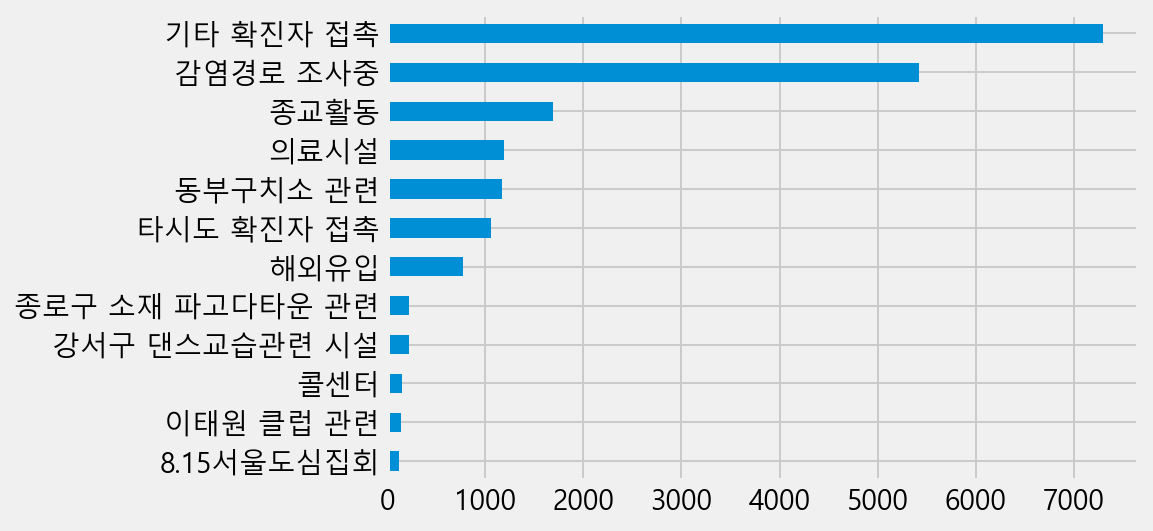

In [21]:
contact_count_top.sort_values().plot.barh()

In [22]:
df_top = df[df["접촉력"].isin(contact_count_top.index)]
df_top

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,23459,75194,2021-01-24,타시도,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
1,23458,75327,2021-01-24,관악구,-,타시도 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
2,23457,75378,2021-01-24,관악구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
3,23456,75369,2021-01-24,종로구,-,의료시설,치료중,21-01,21-01-24,1,3,2021-03
4,23455,75356,2021-01-24,강동구,-,기타 확진자 접촉,치료중,21-01,21-01-24,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23451,8,13,2020-02-02,타시도,중국,해외유입,퇴원,20-02,20-02-02,2,5,2020-05
23454,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-05
23455,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05
23457,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05


In [23]:
df_top_group = df_top.groupby(["접촉력","년월"])["연번"].count().unstack().fillna(0)
df_top_group.astype(int).style.background_gradient(cmap="Blues")

년월,20-01,20-02,20-03,20-04,20-05,20-06,20-07,20-08,20-09,20-10,20-11,20-12,21-01
접촉력,,,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,0,113,13,0,0,0,0
감염경로 조사중,0,3,41,16,5,66,49,440,286,120,474,2758,1163
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,0,182,42,0
기타 확진자 접촉,1,21,21,9,0,14,33,440,304,116,630,3978,1727
동부구치소 관련,0,0,0,0,0,0,0,0,0,0,3,930,242
의료시설,0,14,9,1,7,48,24,42,109,57,148,515,221
이태원 클럽 관련,0,0,0,0,133,6,0,0,0,0,0,0,0
종교활동,0,3,61,6,10,76,25,817,42,14,129,440,65
종로구 소재 파고다타운 관련,0,0,0,0,0,0,0,0,0,0,1,226,0


In [24]:
df_unknown = df[df["접촉력"] == "감염경로 조사중"]
df_unknown

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,23459,75194,2021-01-24,타시도,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
5,23454,75362,2021-01-24,관악구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
11,23448,75264,2021-01-24,성북구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
12,23447,75354,2021-01-24,마포구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
14,23445,75350,2021-01-24,노원구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23363,96,4743,2020-03-02,서초구,-,감염경로 조사중,퇴원,20-03,20-03-02,3,10,2020-10
23369,90,3616,2020-03-01,강남구,-,감염경로 조사중,퇴원,20-03,20-03-01,3,9,2020-09
23376,83,3517,2020-02-29,영등포구,-,감염경로 조사중,퇴원,20-02,20-02-29,2,9,2020-09
23378,81,3046,2020-02-28,성동구,-,감염경로 조사중,퇴원,20-02,20-02-28,2,9,2020-09


<AxesSubplot:ylabel='년월,주'>

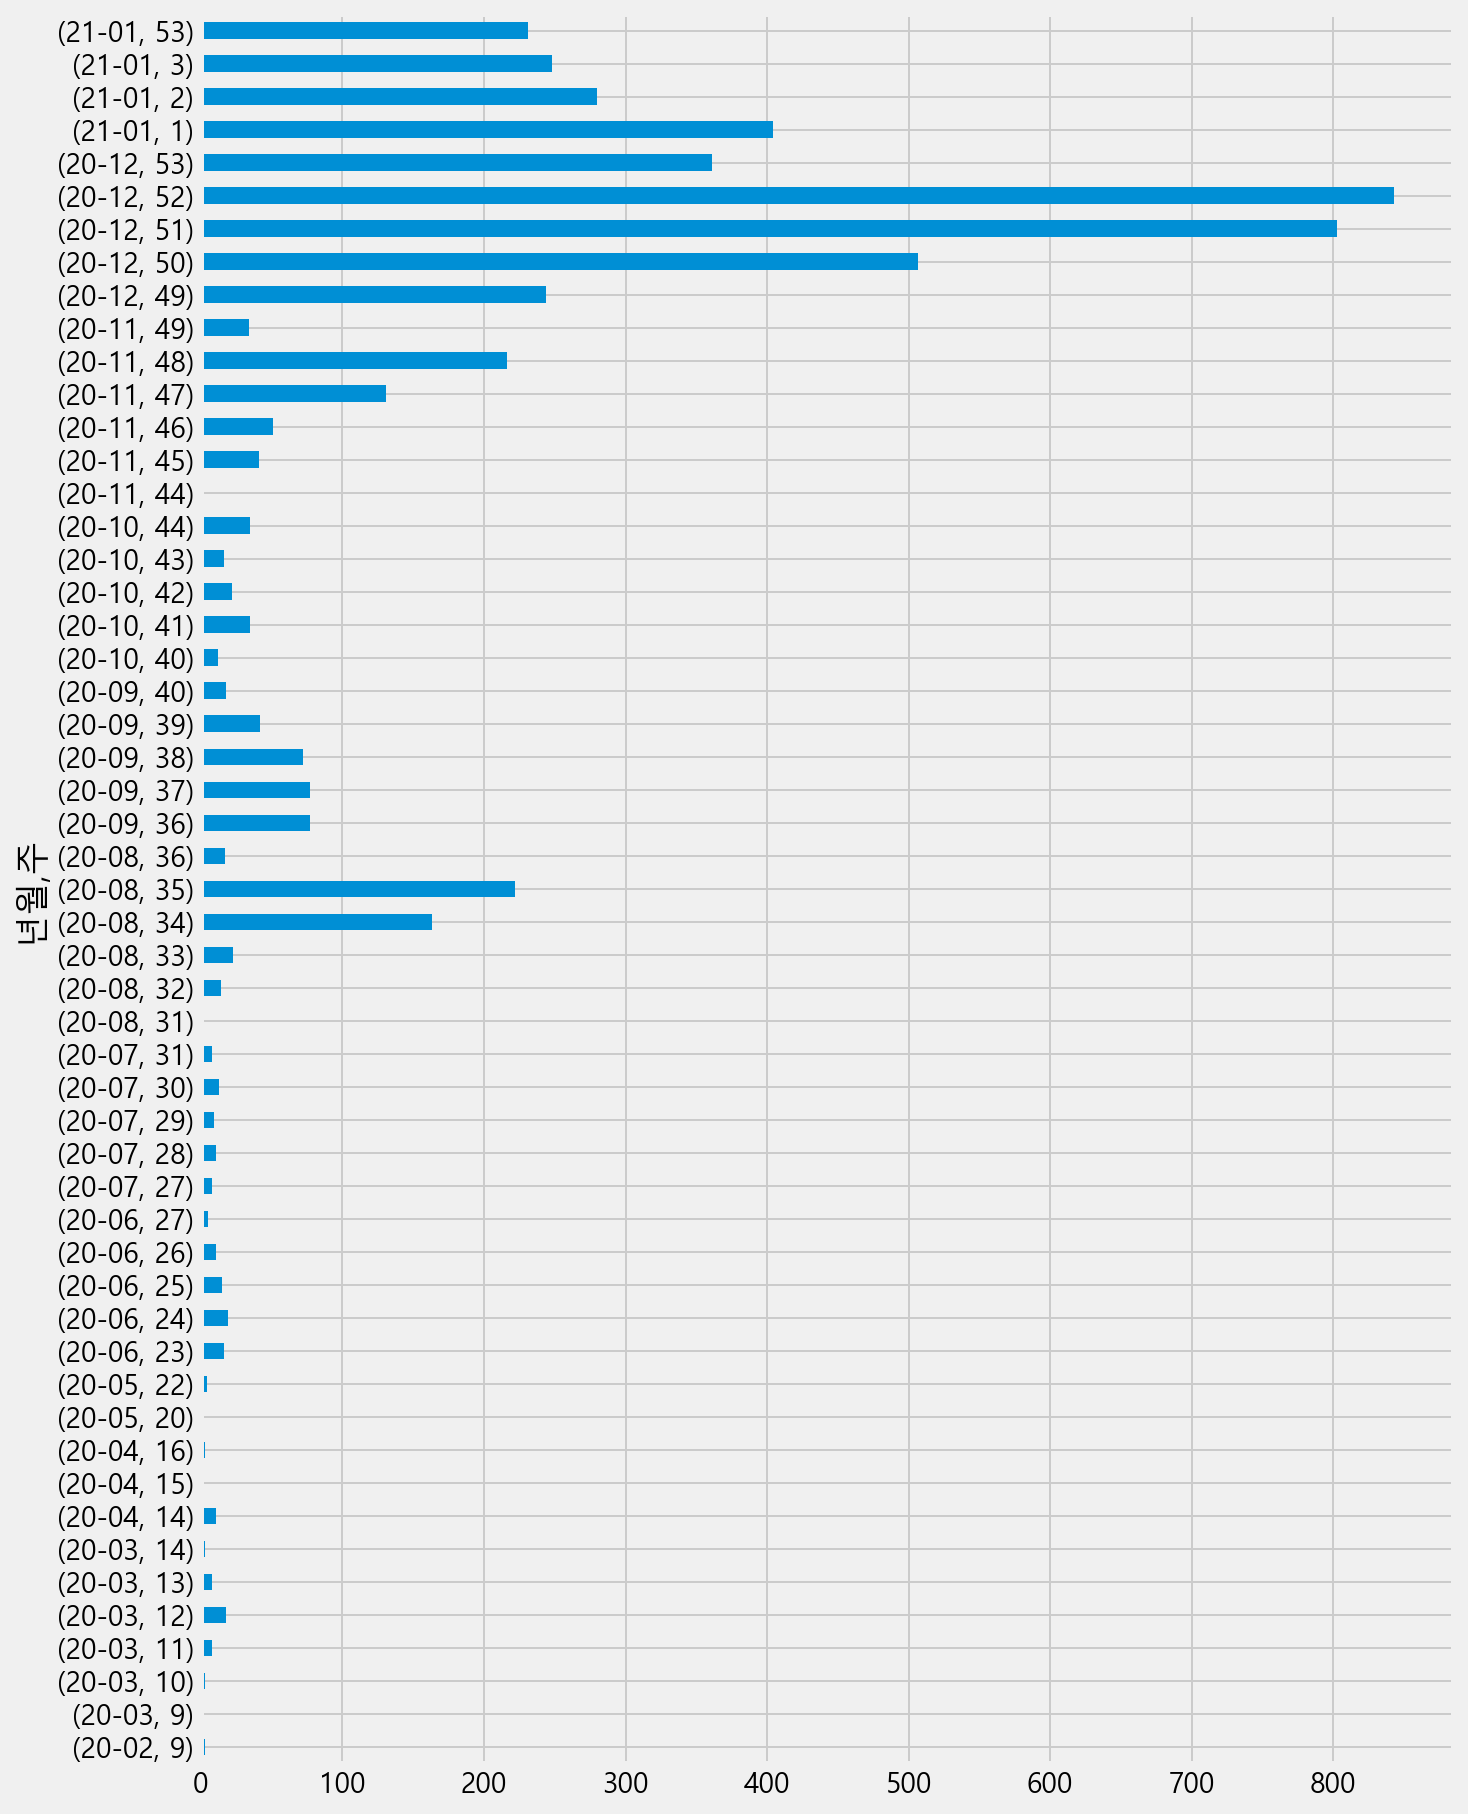

In [25]:
df_unknown.groupby(["년월","주"])["연번"].count().plot.barh(figsize=(10,15))

In [26]:
import datetime

def GetWeekFirstDate(sourceDate):
    weekDayCount = sourceDate.weekday()
    targetDate = sourceDate - datetime.timedelta(days=weekDayCount);
    return targetDate

df['년주'] = df['확진일'].apply(lambda x : GetWeekFirstDate(datetime.datetime.strptime(x,'%Y-%m-%d')).strftime("%Y-%V"))

<AxesSubplot:title={'center':'감염경로 조사중'}, xlabel='확진자수(명)', ylabel='년월,년주'>

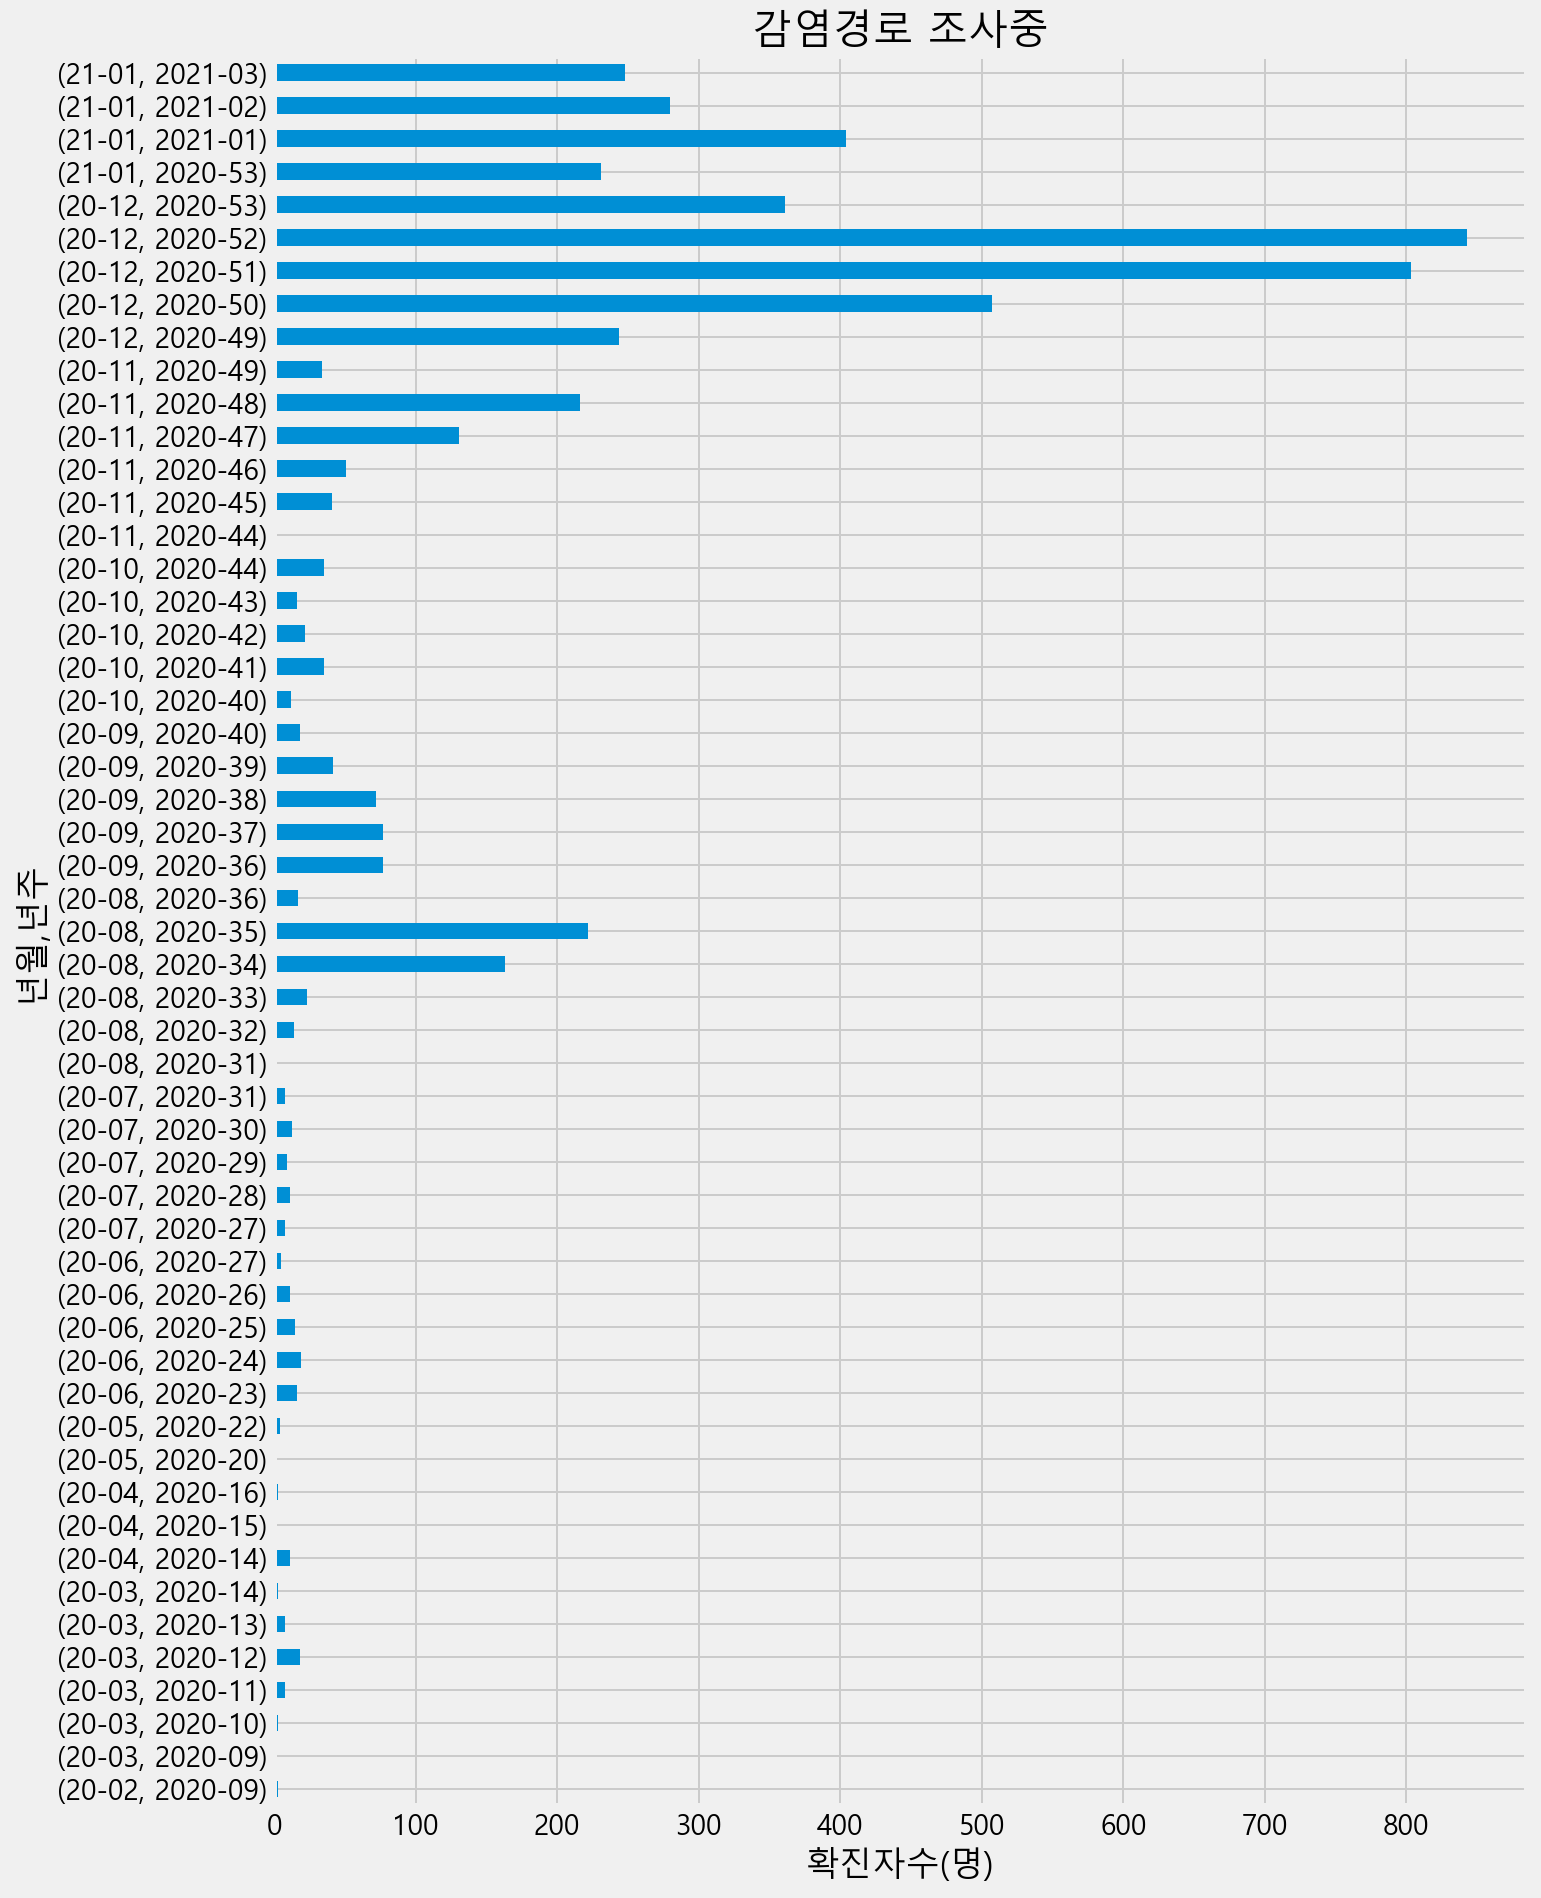

In [27]:
plt.title("감염경로 조사중")
plt.xlabel("확진자수(명)")

df_unknown.groupby(["년월", "년주"])["연번"].count().plot.barh(figsize=(10,15))

In [28]:
df_unknown

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,23459,75194,2021-01-24,타시도,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
5,23454,75362,2021-01-24,관악구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
11,23448,75264,2021-01-24,성북구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
12,23447,75354,2021-01-24,마포구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
14,23445,75350,2021-01-24,노원구,-,감염경로 조사중,치료중,21-01,21-01-24,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23363,96,4743,2020-03-02,서초구,-,감염경로 조사중,퇴원,20-03,20-03-02,3,10,2020-10
23369,90,3616,2020-03-01,강남구,-,감염경로 조사중,퇴원,20-03,20-03-01,3,9,2020-09
23376,83,3517,2020-02-29,영등포구,-,감염경로 조사중,퇴원,20-02,20-02-29,2,9,2020-09
23378,81,3046,2020-02-28,성동구,-,감염경로 조사중,퇴원,20-02,20-02-28,2,9,2020-09


In [29]:
unknown_case = pd.DataFrame(df_unknown["년월"].value_counts())
unknown_case.columns = ["감염경로 불명확 확진수"]
unknown_case

,감염경로 불명확 확진수
20-12,2758
21-01,1163
20-11,474
20-08,440
20-09,286
20-10,120
20-06,66
20-07,49
20-03,41
20-04,16


In [30]:
total_case = pd.DataFrame(df["년월"].value_counts())
total_case.columns = ["전체 확진수"]
total_case

,전체 확진수
20-12,10426
21-01,4073
20-11,2903
20-08,2415
20-09,1306
20-10,733
20-06,459
20-03,391
20-07,281
20-05,229


In [31]:
total_unknown = total_case.merge(unknown_case,left_index = True, right_index = True)
total_unknown = total_unknown.sort_index(ascending = False)
total_unknown

,전체 확진수,감염경로 불명확 확진수
21-01,4073,1163
20-12,10426,2758
20-11,2903,474
20-10,733,120
20-09,1306,286
20-08,2415,440
20-07,281,49
20-06,459,66
20-05,229,5
20-04,156,16


In [32]:
total_unknown_ratio = (unknown_case["감염경로 불명확 확진수"] / total_case["전체 확진수"]) * 100
total_unknown_ratio = round(total_unknown_ratio,2)
total_unknown_ratio

20-01      NaN
20-02     3.75
20-03    10.49
20-04    10.26
20-05     2.18
20-06    14.38
20-07    17.44
20-08    18.22
20-09    21.90
20-10    16.37
20-11    16.33
20-12    26.45
21-01    28.55
dtype: float64

In [33]:
total_unknown["감염 비율(%)"] = total_unknown_ratio
total_unknown

,전체 확진수,감염경로 불명확 확진수,감염 비율(%)
21-01,4073,1163,28.55
20-12,10426,2758,26.45
20-11,2903,474,16.33
20-10,733,120,16.37
20-09,1306,286,21.90
20-08,2415,440,18.22
20-07,281,49,17.44
20-06,459,66,14.38
20-05,229,5,2.18
20-04,156,16,10.26


<AxesSubplot:title={'center':'감염경로 불명확 비율'}, xlabel='년-월', ylabel='비율(%)'>

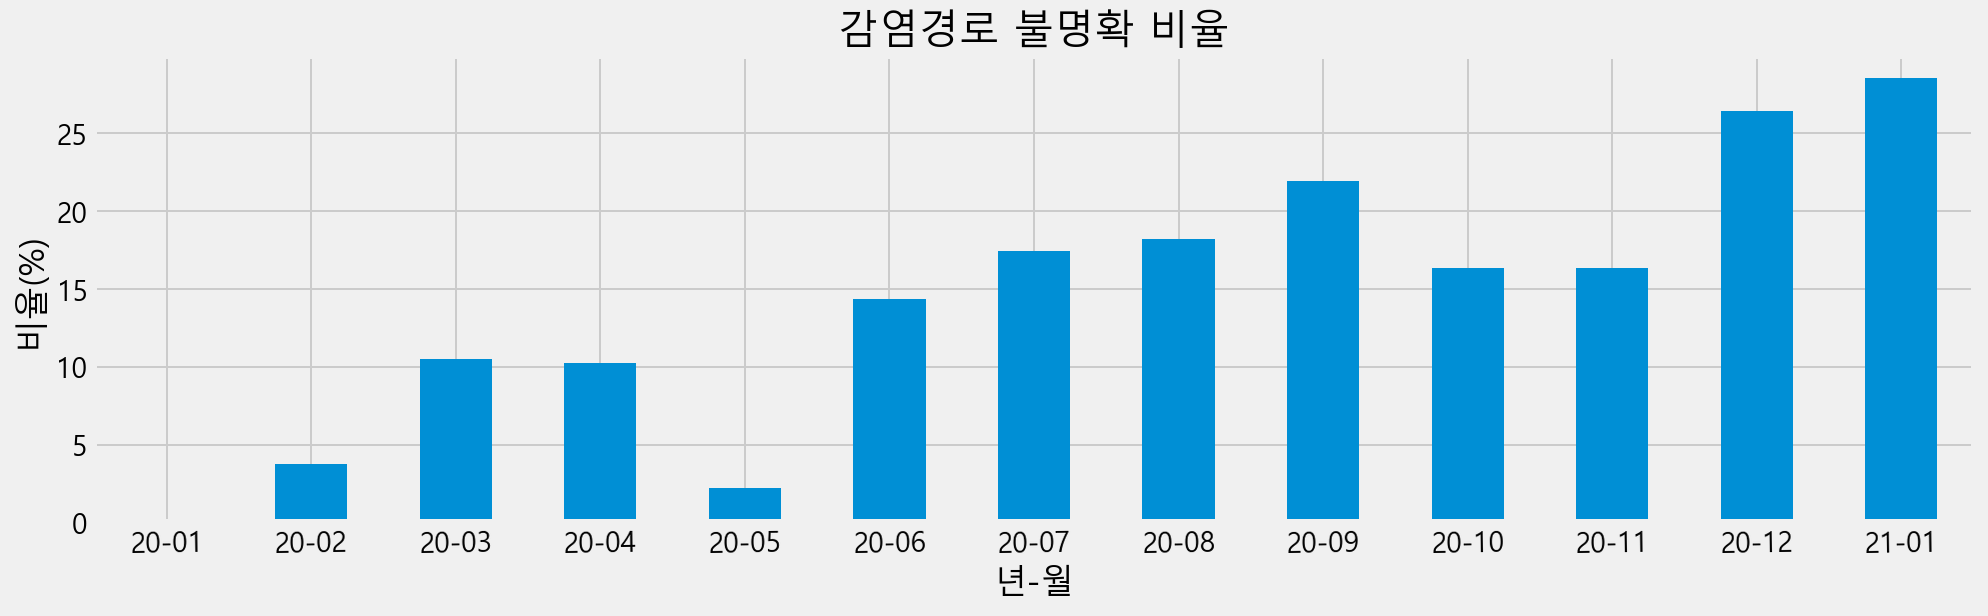

In [34]:
plt.title("감염경로 불명확 비율")
plt.xlabel("년-월")
plt.ylabel("비율(%)")
total_unknown_ratio.plot.bar(figsize=(15,4),rot=1)

In [35]:
df_religion = df[df["접촉력"] == "종교활동"]
df_religion

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
382,23077,74191,2021-01-21,마포구,-,종교활동,치료중,21-01,21-01-21,1,3,2021-03
439,23020,74101,2021-01-21,서대문구,-,종교활동,치료중,21-01,21-01-21,1,3,2021-03
471,22988,74021,2021-01-21,마포구,-,종교활동,치료중,21-01,21-01-21,1,3,2021-03
514,22945,73673,2021-01-20,서대문구,-,종교활동,치료중,21-01,21-01-20,1,3,2021-03
517,22942,73682,2021-01-20,서대문구,-,종교활동,치료중,21-01,21-01-20,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23335,124,7300,2020-03-08,동대문구,-,종교활동,퇴원,20-03,20-03-08,3,10,2020-10
23360,99,5592,2020-03-04,동대문구,-,종교활동,퇴원,20-03,20-03-04,3,10,2020-10
23388,71,2833,2020-02-28,강동구,-,종교활동,퇴원,20-02,20-02-28,2,9,2020-09
23418,41,1246,2020-02-25,타시도,-,종교활동,퇴원,20-02,20-02-25,2,9,2020-09


In [36]:
df_religion_total_count = pd.DataFrame(df_religion["년월"].value_counts())
df_religion_total_count = df_religion_total_count.sort_index()
df_religion_total_count.columns = ["종교활동 확진수"]
df_religion_total_count

,종교활동 확진수
20-02,3
20-03,61
20-04,6
20-05,10
20-06,76
20-07,25
20-08,817
20-09,42
20-10,14
20-11,129


In [37]:
total_religion = total_case.merge(df_religion_total_count,left_index = True, right_index = True)
total_religion = total_religion.sort_index(ascending = False)
total_religion

,전체 확진수,종교활동 확진수
21-01,4073,65
20-12,10426,440
20-11,2903,129
20-10,733,14
20-09,1306,42
20-08,2415,817
20-07,281,25
20-06,459,76
20-05,229,10
20-04,156,6


In [38]:
total_religion_ratio = (df_religion_total_count["종교활동 확진수"] / total_case["전체 확진수"]) * 100
total_religion_ratio = round(total_religion_ratio,2)
total_religion["감염 비율(%)"] = total_religion_ratio
total_religion

,전체 확진수,종교활동 확진수,감염 비율(%)
21-01,4073,65,1.60
20-12,10426,440,4.22
20-11,2903,129,4.44
20-10,733,14,1.91
20-09,1306,42,3.22
20-08,2415,817,33.83
20-07,281,25,8.90
20-06,459,76,16.56
20-05,229,10,4.37
20-04,156,6,3.85


<AxesSubplot:title={'center':'종교활동 감염 비율'}, xlabel='년-월', ylabel='비율(%)'>

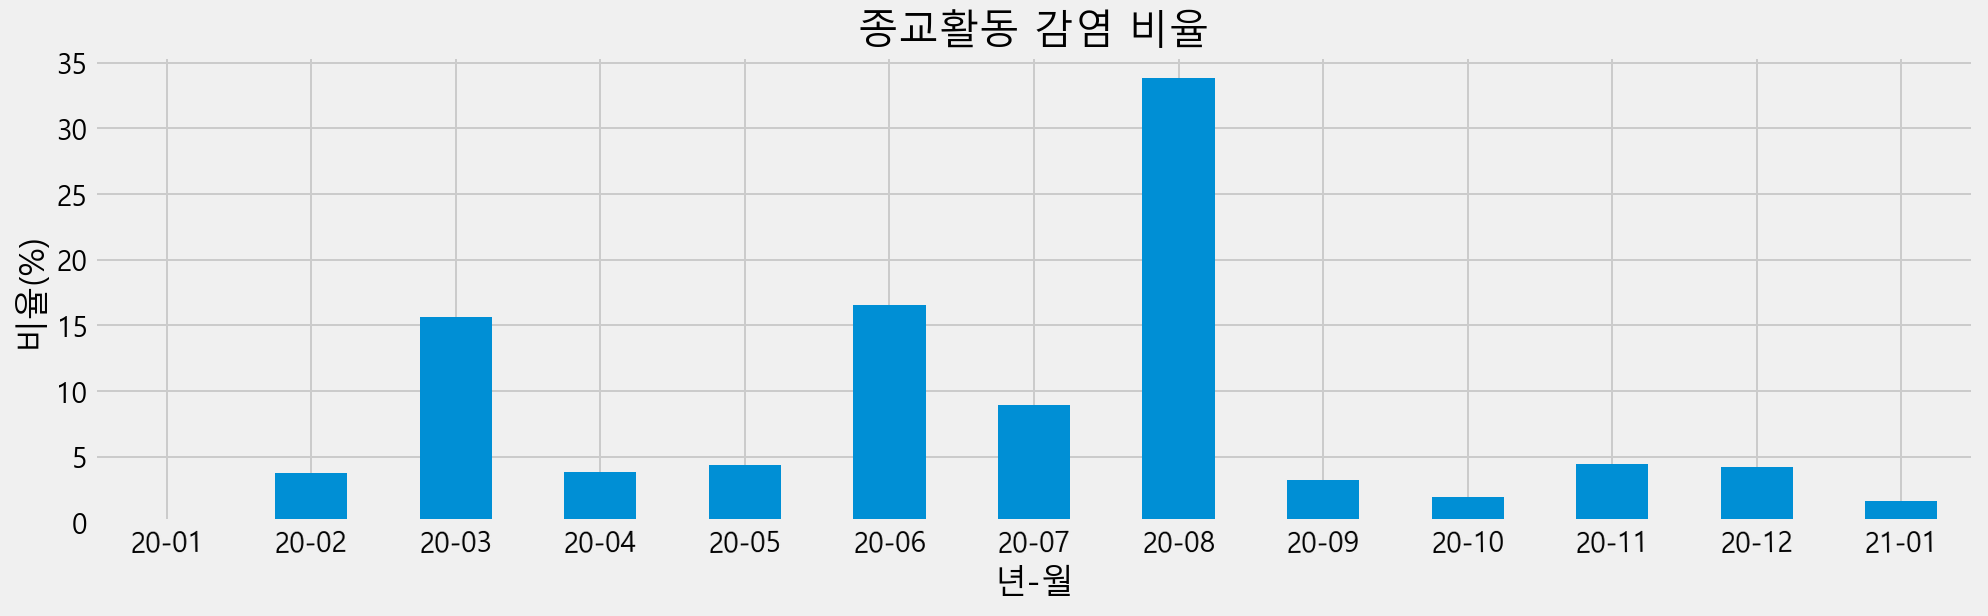

In [39]:
plt.title("종교활동 감염 비율")
plt.xlabel("년-월")
plt.ylabel("비율(%)")
total_religion_ratio.plot.bar(figsize=(15,4),rot=1)

In [40]:
df_hospital = df[df["접촉력"] == "의료시설"]
df_hospital

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
3,23456,75369,2021-01-24,종로구,-,의료시설,치료중,21-01,21-01-24,1,3,2021-03
10,23449,75208,2021-01-24,타시도,-,의료시설,치료중,21-01,21-01-24,1,3,2021-03
24,23435,75268,2021-01-24,성북구,-,의료시설,치료중,21-01,21-01-24,1,3,2021-03
36,23423,75283,2021-01-24,중구,-,의료시설,치료중,21-01,21-01-24,1,3,2021-03
84,23375,75155,2021-01-24,은평구,-,의료시설,치료중,21-01,21-01-24,1,3,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
23424,35,870,2020-02-24,은평구,-,의료시설,퇴원,20-02,20-02-24,2,9,2020-09
23430,29,755,2020-02-23,강동구,-,의료시설,퇴원,20-02,20-02-23,2,8,2020-08
23431,28,627,2020-02-23,종로구,-,의료시설,퇴원,20-02,20-02-23,2,8,2020-08
23434,25,365,2020-02-22,강동구,-,의료시설,퇴원,20-02,20-02-22,2,8,2020-08


In [41]:
df_hospital_total_count = pd.DataFrame(df_hospital["년월"].value_counts())
df_hospital_total_count = df_hospital_total_count.sort_index()
df_hospital_total_count.columns = ["의료시설 감염 확진수"]
df_hospital_total_count

,의료시설 감염 확진수
20-02,14
20-03,9
20-04,1
20-05,7
20-06,48
20-07,24
20-08,42
20-09,109
20-10,57
20-11,148


In [42]:
total_hospital = total_case.merge(df_hospital_total_count,left_index = True, right_index = True)
total_hospital = total_hospital.sort_index(ascending = False)
total_hospital

,전체 확진수,의료시설 감염 확진수
21-01,4073,221
20-12,10426,515
20-11,2903,148
20-10,733,57
20-09,1306,109
20-08,2415,42
20-07,281,24
20-06,459,48
20-05,229,7
20-04,156,1


In [43]:
total_hospital_ratio = (df_hospital_total_count["의료시설 감염 확진수"] / total_case["전체 확진수"]) * 100
total_hospital_ratio = round(total_hospital_ratio,2)
total_hospital["감염 비율(%)"] = total_hospital_ratio
total_hospital

,전체 확진수,의료시설 감염 확진수,감염 비율(%)
21-01,4073,221,5.43
20-12,10426,515,4.94
20-11,2903,148,5.10
20-10,733,57,7.78
20-09,1306,109,8.35
20-08,2415,42,1.74
20-07,281,24,8.54
20-06,459,48,10.46
20-05,229,7,3.06
20-04,156,1,0.64


<AxesSubplot:title={'center':'의료시설 감염 비율'}, xlabel='년-월', ylabel='비율(%)'>

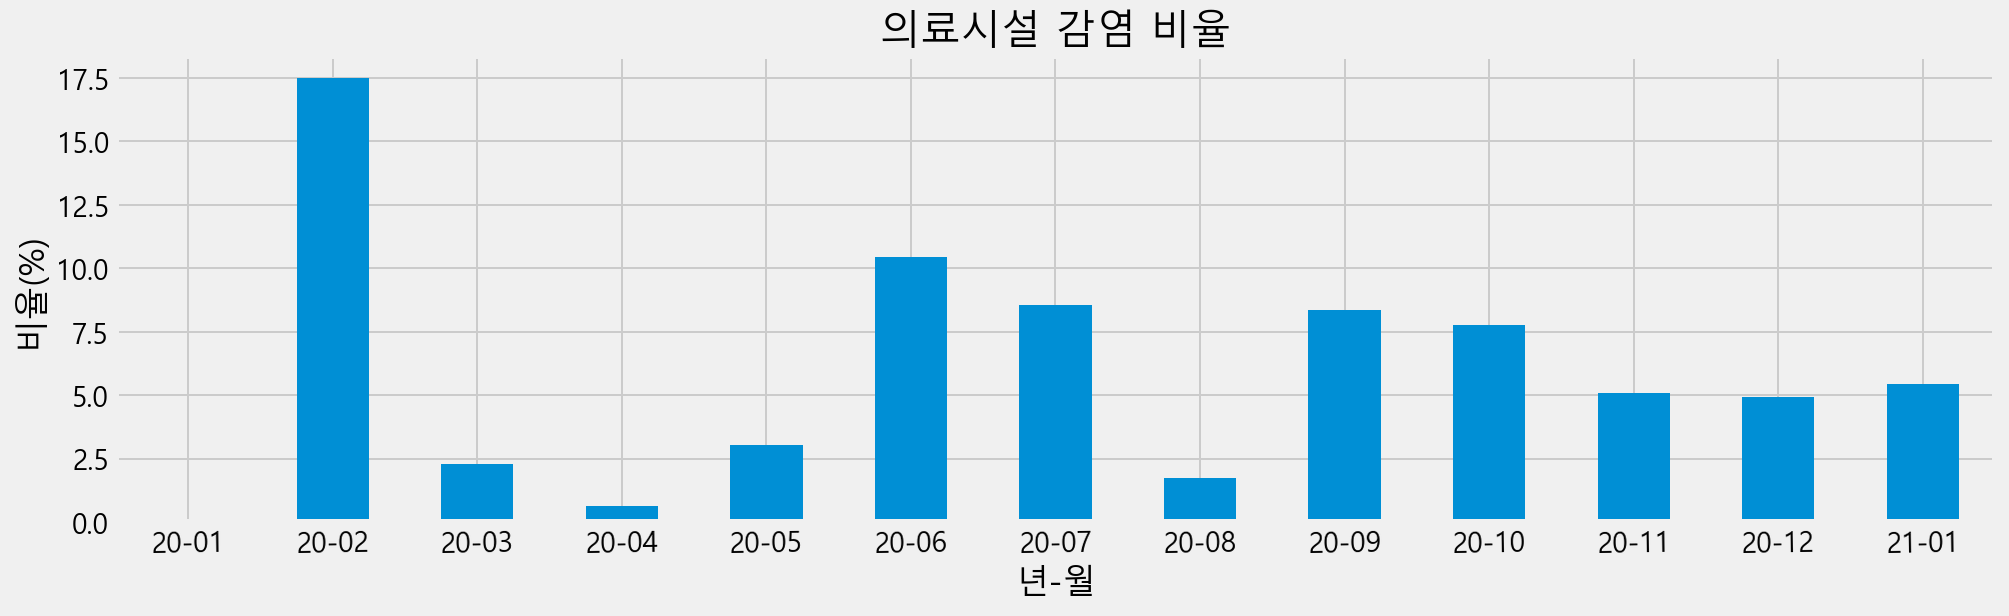

In [44]:
plt.title("의료시설 감염 비율")
plt.xlabel("년-월")
plt.ylabel("비율(%)")
total_hospital_ratio.plot.bar(figsize=(15,4),rot=1)

In [88]:
contact_count

기타 확진자 접촉      7294
감염경로 조사중       5421
종교활동           1688
의료시설           1195
동부구치소 관련       1175
               ... 
신 천 지             1
중랑구 서울의료원         1
중구 통일상가           1
부산시 방문주사 관련       1
삼성물산              1
Name: 접촉력, Length: 296, dtype: int64

In [89]:
contact_count[:6].sum()

17831

In [90]:
contact_count[6:].sum()

5628

In [91]:
total_top5_ratio = ( contact_count[:6].sum() / contact_count.sum()) * 100
total_top5_ratio = total_top5_ratio.round(2)
total_top5_ratio

76.01